# Hoja de Trabajo 2 - Segmentación de especies utilizando "Cluster_Analysis"

## Sección 1

Importación de las librerías para realizar el análisis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generación del data frame "data" para realizar el análisis correspondiente y verificar que se puedan visualizar los datos correctamente.

In [4]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualización de la distribución de los datos utilizando seaborn para graficar.

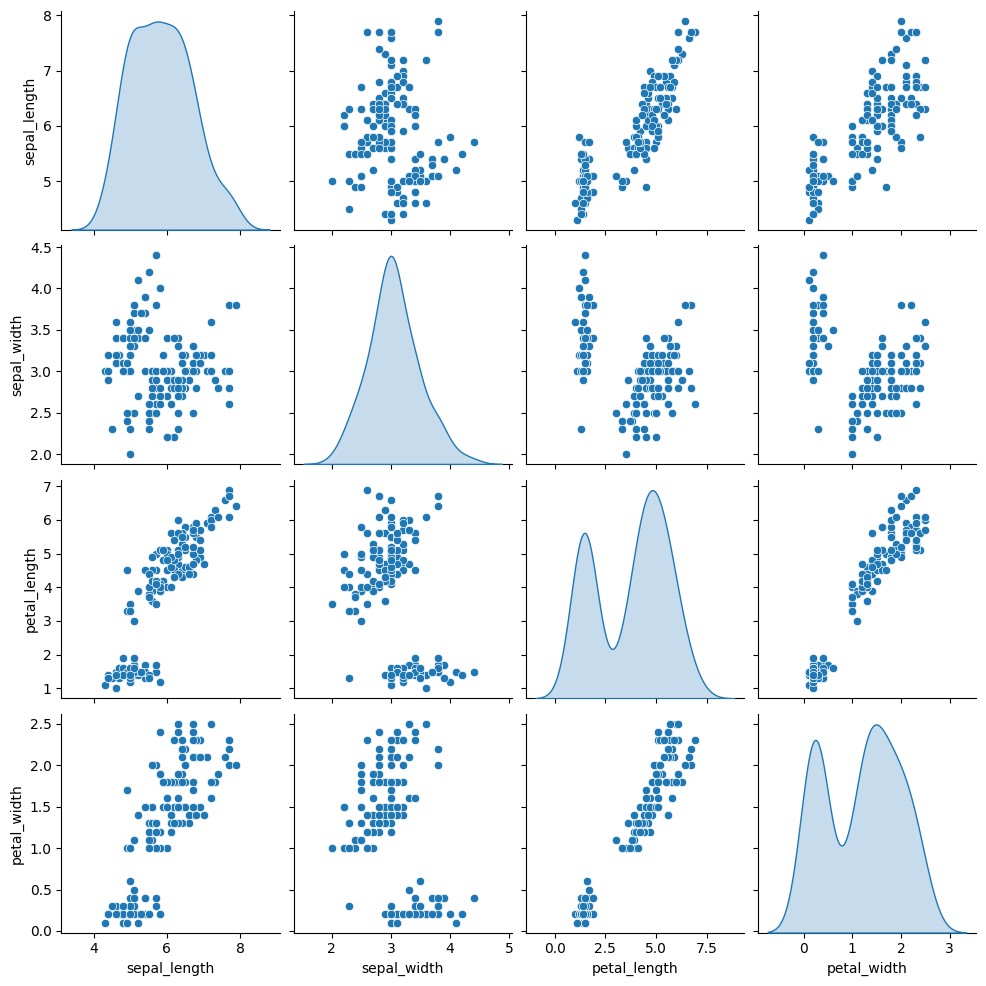

In [5]:
sns.pairplot(data, diag_kind='kde')
plt.show()

Implementación de K-Means con 2 clusters

c:\Users\lpmon\Documents\GitHub\CC3074_HT2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lpmon\Documents\GitHub\CC3074_HT2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lpmon\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lpmon\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Use

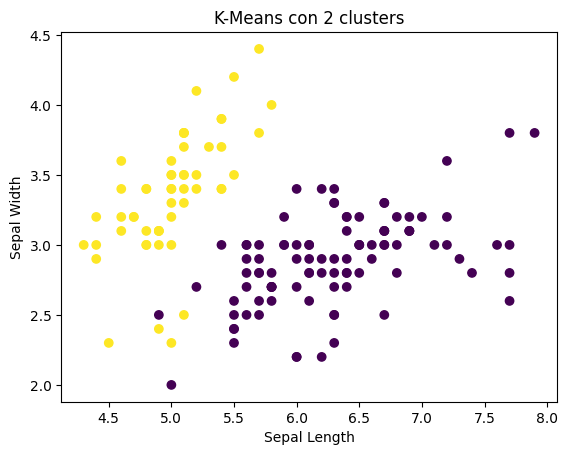

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=50)
data["cluster"] = kmeans.fit_predict(data.iloc[:, :-1])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data["cluster"], cmap="viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means con 2 clusters")
plt.show()

Estandarización de los datos y comparación de resultados

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])
kmeans_scaled = KMeans(n_clusters=2, random_state=50)
data["cluster_scaled"] = kmeans_scaled.fit_predict(scaled_data)

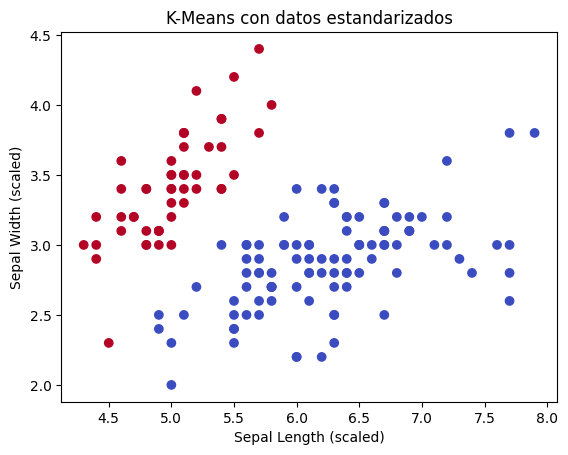

In [8]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data["cluster_scaled"], cmap="coolwarm")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("K-Means con datos estandarizados")
plt.show()

Se puede observar una diferencia entre los clusters formados entre los datos estandarizados y los datos no estandarizados. Hay pocos puntos que pasaron a ser de un cluster al otro.

## Sección 2

### Forma del pétalo 

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-means de 2 núcleos con pétalos

In [9]:
kmeans_petal = KMeans(n_clusters=2, random_state=50)
data["cluster_petal"] = kmeans_petal.fit_predict(data[['petal_length', 'petal_width']])


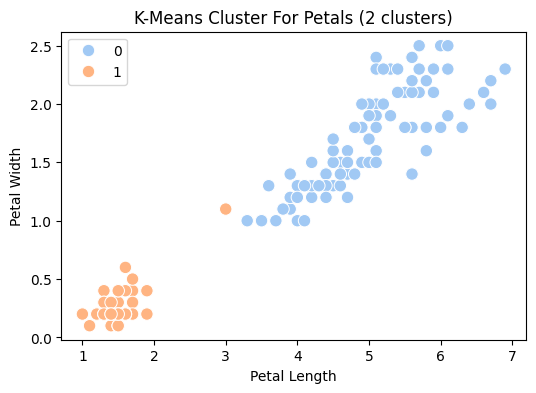

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['cluster_petal'], palette='pastel', s=80)
plt.xlabel("Petal Length")  
plt.ylabel("Petal Width")
plt.legend()
plt.title("K-Means Pétalos 2 Núcleos")
plt.show()


Ahora con datos estandarizados

In [15]:
scaler_petal = StandardScaler()
scaled_data_petal = scaler_petal.fit_transform(data[['petal_length','petal_width']])
kmeans_scaled_petal = KMeans(n_clusters=2, random_state=50)
data['cluster_scaled_petal'] = kmeans_scaled_petal.fit_predict(scaled_data_petal)

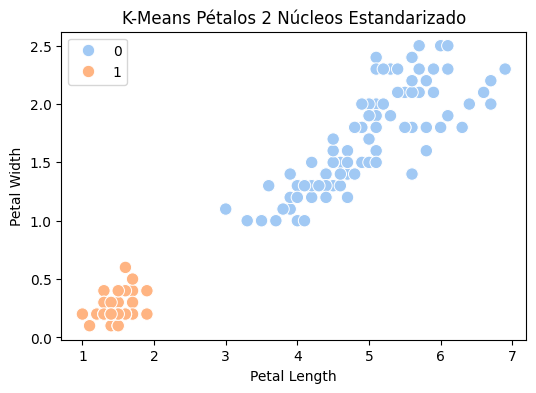

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['cluster_scaled_petal'], palette='pastel', s=80)
plt.xlabel("Petal Length")  
plt.ylabel("Petal Width")
plt.legend()
plt.title("K-Means Pétalos 2 Núcleos Estandarizado")
plt.show()

### Diferencias
La diferencia más notable entre los k-means estandarizados y no estandarizados es que al estandarizar hay mayor agrupación entre los datos y los clusters. Por ejemplo, en el caso de los pétalos los clusters tienen los datos más concentrados, al menos en el caso del cluster 1 a comparación de no estandarizado. 

### Método del Codo

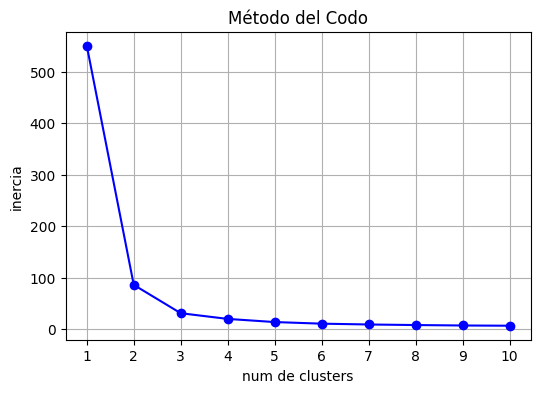

In [22]:
inertia = []
K = range(1,11) # elegir un rango de clusters

X = data[['petal_length', 'petal_width']]
for k in K:
    kmeans_petal = KMeans(n_clusters=k, random_state=50)
    kmeans_petal.fit(X)
    inertia.append(kmeans_petal.inertia_) # agregar la inercia de cada cluster

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('num de clusters')
plt.ylabel('inercia')
plt.title('Método del Codo')
plt.xticks(K)
plt.grid()
plt.show()


Como podemos ver en la gráfica usando wl WCSS para estimar el número óptimo de clusters, tenemos que es 3, ya que es donde el cambio va siendo menos gradual a lo largo del número de clusters.

## Sección 3
Emplear la librería Kneed para estimar clusters y comparar datos

In [ ]:
#pip install kneed 

In [31]:
from kneed import KneeLocator
inertia = []
K = range(1,11) # elegir un rango de clusters

X = data[['petal_length', 'petal_width']]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # agregar la inercia de cada cluster




knee_locator = KneeLocator(K, inertia, curve='convex', direction='decreasing') # instanciamos el Knee Locator
optimal_k = knee_locator.elbow

print(f"Número óptimo de clusters: {optimal_k}")



Número óptimo de clusters: 2
